In [12]:
%load_ext autoreload
%autoreload 2
import sys, warnings, time, numpy, yaml, pandas
sys.path.append("../src/") # go to parent dir
from data_access import get_X, get_y, get_train_test
from models.factory import ModelFactory
from models.xgboost_model import XgboostModel
from models.sklearn_model import SklearnModel
warnings.filterwarnings('ignore')

In [13]:
feature=['HOME_WINS', 'DRAW', 'AWAY_WINS']
train_data = get_X('train')
train_scores = get_y()
test_data = get_X('test')
X_train, y_train, X_test, y_test, target = get_train_test(train_size=0.8, random_state=42, feature=feature)

In [14]:
def eval_model(model, save_model=False):
    start = time.time()
    model.fit()
    score = model.evaluate(X_test)
    end = time.time()
    print(f'{model.name}={score} in {numpy.round((end-start), 2)}s')
    if save_model:
        model.save(test_data)
    return {'name': model.name, 'score': score, 'time': numpy.round((end-start), 2)}

In [15]:
# %load_ext autoreload
# %autoreload 2
# name= 'decision_tree'
# with open('../confs/models.yaml', 'r') as file:
#     configurations = yaml.safe_load(file)
# factory = ModelFactory(configurations, X_train, y_train, train_scores)
# model = factory.get_model(name)
# line = eval_model(model)

In [16]:
# %load_ext autoreload
# %autoreload 2
# save_model = True
# with open('../confs/models.yaml', 'r') as file:
#     configurations = yaml.safe_load(file)
# factory = ModelFactory(configurations, X_train, y_train, train_scores)
# lines = []
# for model in factory.get_models():
#     model.fit()
#     score = model.evaluate(X_test)
#     lines.append(eval_model(model, save_model))
# df = pandas.DataFrame(lines)
# df = df.sort_values(by=['score'], ascending=False)
# print(df.sort_values(by=['score'], ascending=False))

In [17]:
from tensorflow import keras
from numpy.random import seed
from tensorflow.random import set_seed
seed(1)
set_seed(2)

In [18]:
import seaborn as sns, keras, pandas as pd, numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
def plot_history(history, metrics):
    """
    Plot the training history

    Args:
        metrics(str, list): Metric or a list of metrics to plot
    """
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics])
    plt.xlabel("epochs")
    plt.ylabel("RMSE")
def build_model(activation_name='relu'):
    inputs = keras.Input(shape=X_train.shape[1])
    hidden_layer = keras.layers.Dense(20, activation=activation_name)(inputs)
    output_layer = keras.layers.Dense(3, activation="softmax")(hidden_layer)
    model = keras.Model(inputs=inputs, outputs=output_layer)
    model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy())
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 10, epochs = 100, verbose=0)
    plot_history(history, 'val_loss')
    return model
def predict(estimator, x):
    def decode(row):
        j = np.argmax(row)
        decode_value = [-1, 0, 1][j]
        # print(f'row={row},j={j},decode_value={decode_value}')
        return decode_value        
    y_predict = pd.DataFrame(x['ID'].copy(), columns=['ID'])
    y_predict['reod'] = [decode(y) for y in estimator.predict(x)]
    y_predict = y_predict.reset_index(drop=True)
    return y_predict.astype('int32', copy=False)

KeyError: 'ID'

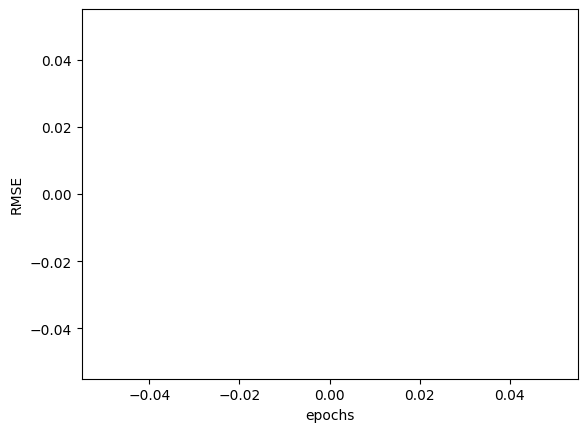

In [19]:
model = build_model('elu')
y_predict = predict(model, X_test)
score = accuracy_score(y_test['reod'].values.tolist(), y_predict['reod'].values.tolist())
print('scrore={score}')

In [20]:
plot_history(history, 'val_loss')

NameError: name 'history' is not defined

In [ ]:
build_model('elu')

In [21]:

import keras, pandas

x = X_train
y = y_train

activation_name='relu'
inputs = keras.Input(shape=X_train.shape[1])
hidden_layer = keras.layers.Dense(20, activation=activation_name)(inputs)
output_layer = keras.layers.Dense(3, activation="softmax")(hidden_layer)
model = keras.Model(inputs=inputs, outputs=output_layer)
model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy())
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 10, epochs = 100, verbose=0)

# y = pandas.DataFrame(x['ID'].copy(), columns=['ID'])
# prediction = self.model.predict(x)
# prediction = self.model.predict(x)
# y['fraud_flag'] = [p[1] for p in prediction]
# y = y.reset_index(drop=True)



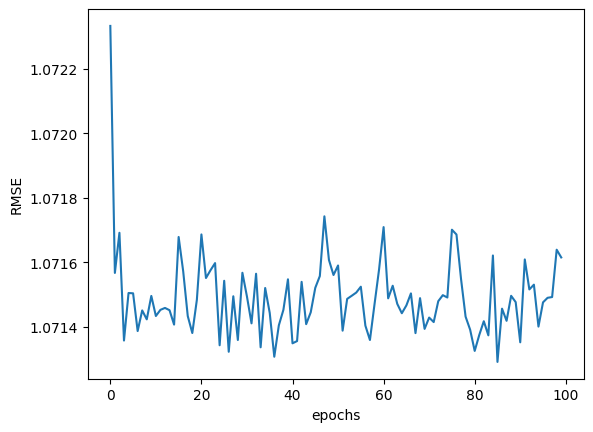

In [22]:
plot_history(history, 'val_loss')